['dataat1midf', 'dataatf', 'dataatmidf', 'dataatstart']
[ 2.51337639 -0.02753064  2.48415428  5.00000033]
[    0.   284.   568.   852.  1136.]
[-0.02753064  2.51337639  2.48415428  5.00000033]
[-0.02753064  2.51337639  5.00000033  2.48415428]
0.0216960018423


ValueError: x and y must be the same size

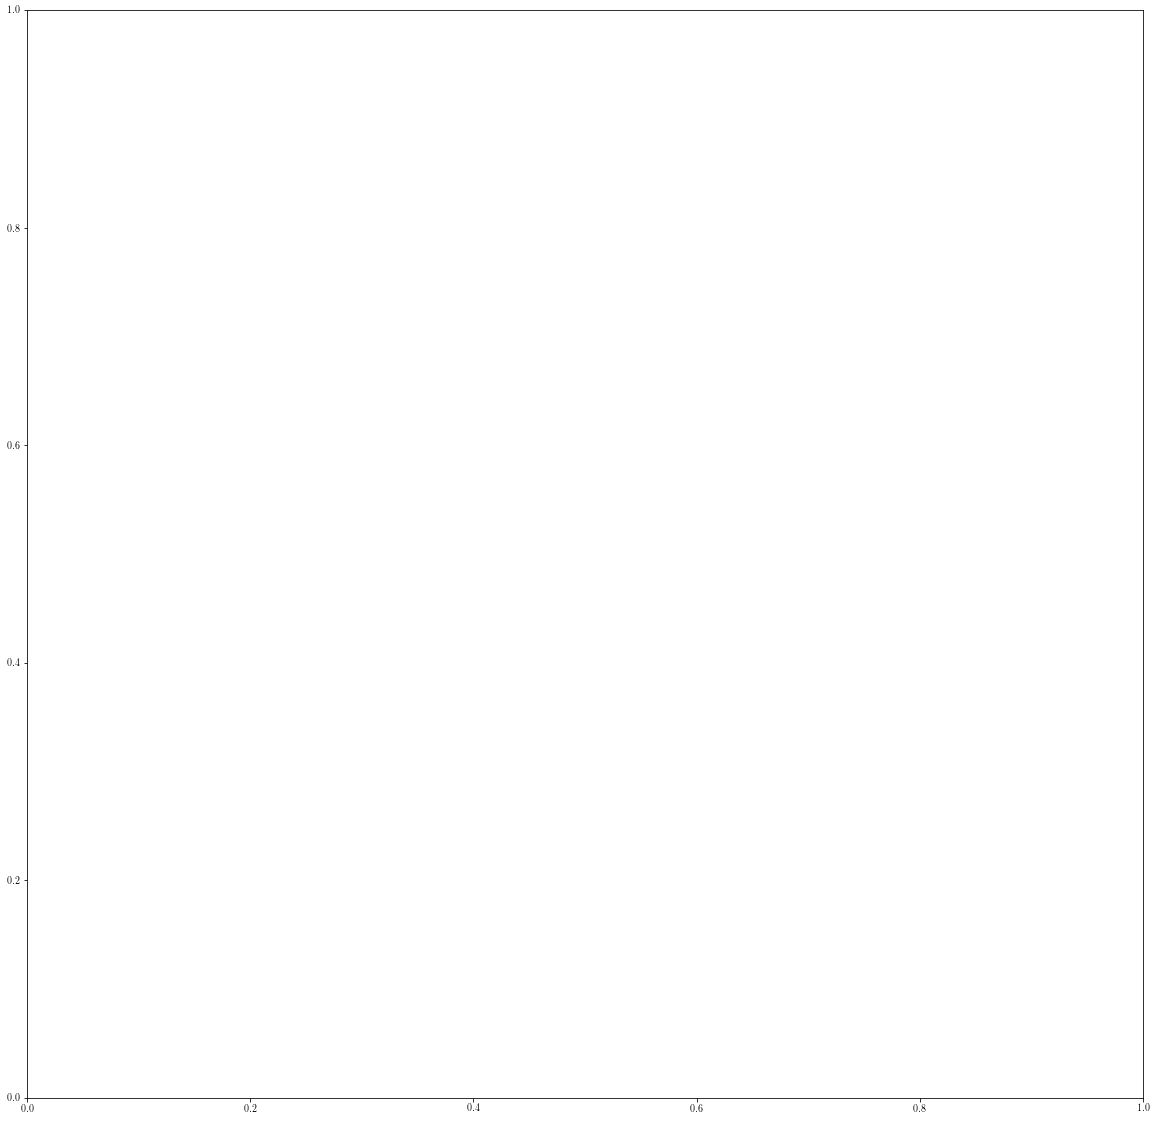

In [3]:
%run '/Users/eseguraca.6/Desktop/SLACfiles/slacecodes/utilities.ipynb'



c_pwd = Popen(["pwd"], stdout=PIPE, stderr=PIPE)
c_p = c_pwd.communicate()[0].decode('utf-8').rstrip()


f = data_pathfiles_generator(c_p)

fnames = filename_generator(c_p)

data_arr = data_generator(f)

print(fnames)
#plot_generator(data_arr, 2, 3, 20, 20, 0.95, 20, 15, 15,'x', 'irradiance', 'test new lens at f=1600', fnames, 'tf1600')

waist = np.multiply(2, fit_parameter_extractor(gaussian, data_arr)[2])

print(waist)

fl = 568
step = np.divide(fl,2)
fmax = 2.5*fl
exp_x = np.arange(0,fmax,step)
print(exp_x)

f = plt.figure(figsize=(20,20))
f0 = f.add_subplot(111)

waist[1], waist[0] = waist[0], waist[1]
print(waist)
waist[2], waist[3] = waist[3], waist[2]
print(waist)
print(lens_waist_size(568, 5, 600,568))
numx = np.arange(0, fmax, 0.01)
numw = lens_waist_size(numx, 5,600,568)
f0.scatter(exp_x, np.abs(waist))
f0.plot(numx, numw, linestyle = ':', color = 'red')
f0.tick_params(axis = 'both', labelsize=60)
f0.set_xlabel('Beam Position along axis (mm)', fontsize=60)
f0.set_ylabel(r'$W(z)$', fontsize=60)
f.suptitle('Beam Waist PLCX Lens f = 1600mm', fontsize=60)

f.tight_layout()